# Predicting Customer Booking Behaviour – British Airways

This project builds a machine learning model to predict whether a customer will complete a booking, using historical booking data.

In [1]:
import numpy as np
print(np.__version__)


1.26.4


In [2]:
import sys,numpy as np,pandas as pd
print("System :",sys.version)
print("Numpy :",np.__version__)
print("Pandas :",pd.__version__)

System : 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]
Numpy : 1.26.4
Pandas : 2.3.3


## Data Loading

The dataset contains 50,000 customer booking records with both numerical and categorical features.

In [3]:
df=pd.read_csv(r"C:\Users\arunk\OneDrive\Desktop\Data Analyst\Data Analyst Bootcamp\Forage Intership\British Airways\customer_booking.csv",encoding="latin1")


In [4]:
print(df.shape)
df.head()

(50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Exploratory Data Analysis

We explore data types, missing values, and class balance of the target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [7]:
df["booking_complete"].value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

## Feature Selection & Target Variable

- Target variable: `booking_complete`
- Features: all remaining customer and booking attributes

In [8]:
x=df.drop(columns=["booking_complete"])
y=df["booking_complete"]

In [9]:
x.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [10]:
x.select_dtypes(include="object")

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,PERPNH,Australia
49996,Internet,RoundTrip,Sun,PERPNH,Australia
49997,Internet,RoundTrip,Sat,PERPNH,Australia
49998,Internet,RoundTrip,Mon,PERPNH,Australia


In [11]:
x.select_dtypes(include="object").columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

## Encoding Categorical Variables

Categorical features are converted into numerical form using one-hot encoding.

In [12]:
x_encoded=pd.get_dummies(x,drop_first=True)

In [13]:
x_encoded.shape

(50000, 918)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_encoded,y,test_size=0.2,stratify=y,random_state=42)

In [15]:
x_train.shape, x_test.shape


((40000, 918), (10000, 918))

## Model Training

A Random Forest classifier is trained to handle non-linear relationships and class imbalance.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,class_weight="balanced",n_estimators=200)

rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [17]:
y_pred=rf.predict(x_test)

## Model Evaluation

Model performance is evaluated using accuracy, confusion matrix, and stratified cross-validation with F1-score and recall.

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8521

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[8366,  138],
       [1341,  155]], dtype=int64)

In [20]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scores_f1 = cross_val_score(rf,x_train,y_train,scoring="f1",cv=cv)
scores_recall = cross_val_score(rf,x_train,y_train,scoring="recall",cv=cv)

print("F1 per fold:", scores_f1)
print("Mean F1:", scores_f1.mean())
print("Std F1:", scores_f1.std())


print("Recall per fold:", scores_recall)
print("Mean Recall:", scores_recall.mean())
print("Std Recall:", scores_recall.std())


F1 per fold: [0.18008186 0.17553559 0.19301848 0.19212163 0.18630137]
Mean F1: 0.18541178551658521
Std F1: 0.006776762801898422
Recall per fold: [0.11036789 0.10618729 0.11789298 0.11612364 0.11361738]
Mean Recall: 0.11283783594996408
Std Recall: 0.004178253747316356


## Feature Importance

The most influential features affecting booking completion are visualised below.

In [21]:
importance = pd.Series(rf.feature_importances_,index=x_encoded.columns).sort_values(ascending=False)
importance.head(10)

purchase_lead               0.123312
length_of_stay              0.104030
flight_hour                 0.101648
booking_origin_Australia    0.048874
flight_duration             0.043249
num_passengers              0.039410
booking_origin_Malaysia     0.034854
wants_in_flight_meals       0.020848
wants_extra_baggage         0.017544
wants_preferred_seat        0.016247
dtype: float64

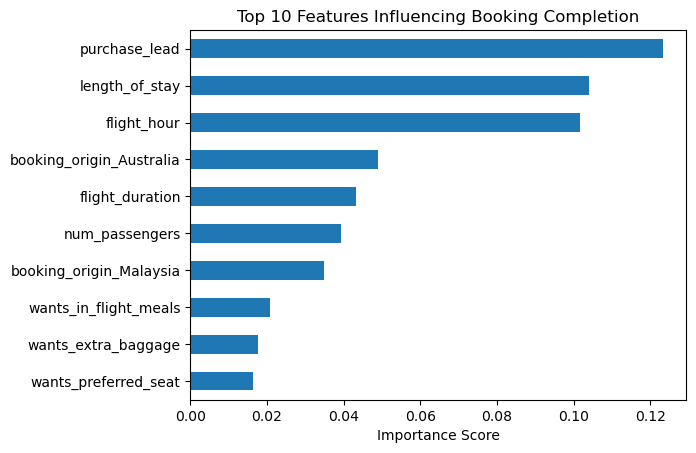

In [22]:
import matplotlib.pyplot as plt 
top10 = importance.head(10)
top10.sort_values().plot(kind="barh")
plt.title("Top 10 Features Influencing Booking Completion")
plt.xlabel("Importance Score")
plt.show()